In [1]:
datasetName = 'eye_retina_Menon2019'
#datasetName value: organ_tissue_authorYear without space
# dataFormat = '10x'
#dataFormat value: tsv (tab separated), 10X (sparse)
setwd("/stor/public/hcad/eye_retina_Menon2019")

In [2]:
library(Matrix)
matrix_dir = "/stor/public/hcad/eye_retina_Menon2019/eye_retina_Menon2019_expression_seq-well/"
barcode.path <- paste0(matrix_dir, "barcodes.tsv")
features.path <- paste0(matrix_dir, "genes.tsv")
matrix.path <- paste0(matrix_dir, "matrix.mtx")
data.matrix <- as.matrix(readMM(file = matrix.path))
feature.names = read.delim(features.path, 
                           header = FALSE,
                           stringsAsFactors = FALSE)
barcode.names = read.delim(barcode.path, 
                           header = FALSE,
                           stringsAsFactors = FALSE)
colnames(data.matrix) = barcode.names$V1
rownames(data.matrix) = feature.names$V1

In [3]:
data.matrix

,GCCGTGGTATCA_MR8hrs,GCCAGTAAACCC_MR8hrs,TGAACTTTTGCT_MR8hrs,AGATCCCTGTTA_MR8hrs,CACAGCGACGAA_MR8hrs,AGTGGCCCATAA_MR8hrs,TGGCTATCTGAC_MR8hrs,TTAGGTCTGTGA_MR8hrs,GCTGGACCGTAC_MR8hrs,ATCGAATTCGGC_MR8hrs,⋯,AAATAAGTGTGG_MR28hrs,CAATTACCCCGA_MR28hrs,GGTAACTCTAGA_MR28hrs,GTAACCCTTACG_MR28hrs,GACACTCCTGGA_MR28hrs,ATACTGCACCGC_MR28hrs,GCTGGCGTGATG_MR28hrs,GCACGGAATTCT_MR28hrs,GACTTTGCCGGT_MR28hrs,ATGAACTACGAT_MR28hrs
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M,0,45,0,0,0,10,0,0,0,5,⋯,0,0,0,1,0,0,0,0,0,0
A2M-AS1,0,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAAS,0,0,0,0,0,1,0,0,0,0,⋯,0,2,0,0,0,0,0,0,0,0
AACS,0,0,0,0,0,0,0,1,3,0,⋯,0,0,0,0,0,0,0,0,0,0
AADAT,0,0,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAED1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAGAB,0,0,0,0,0,0,2,0,0,1,⋯,0,0,0,0,0,1,0,0,0,0
AAK1,9,5,2,0,4,4,3,7,4,1,⋯,0,0,3,0,0,0,0,0,0,0


In [3]:
library(Seurat)
library(data.table)
library(ggplot2)
# Load the organized dataset
# if(dataFormat == 'tsv'){
#     data.matrix <- data.table::fread(paste0(datasetName,"_expression.tsv.gz"), h = T, data.table = F)
# } else{
#    # system(paste0("tar -zxvf ", datasetName, "_expression_10x.tar.gz")) #Invoke the unix command
#    data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression_10x"))
#    # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
# }
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata_seq-well.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation_seq-well.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}


In [4]:
data.matrix[1:5, 1:5]
data.metadata[1:5, ]
data.annotation[1:5,]

,GCCGTGGTATCA_MR8hrs,GCCAGTAAACCC_MR8hrs,TGAACTTTTGCT_MR8hrs,AGATCCCTGTTA_MR8hrs,CACAGCGACGAA_MR8hrs
A1BG-AS1,0,0,0,0,0
A2M,0,45,0,0,0
A2M-AS1,0,2,0,0,0
A4GALT,0,0,0,0,0
AAAS,0,0,0,0,0


,organ,region,subregion,sample_status,donor_ID,donor_gender,donor_age
,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,<int>
GCCGTGGTATCA_MR8hrs,retina,MR,NA,normal,time_8hrs,F,66
GCCAGTAAACCC_MR8hrs,retina,MR,NA,normal,time_8hrs,F,66
TGAACTTTTGCT_MR8hrs,retina,MR,NA,normal,time_8hrs,F,66
AGATCCCTGTTA_MR8hrs,retina,MR,NA,normal,time_8hrs,F,66
CACAGCGACGAA_MR8hrs,retina,MR,NA,normal,time_8hrs,F,66


[1] BPs HCs BPs BPs BPs
Levels: ACs BPs Cones Endo HCs Macroglia Microglia RGCs Rods

In [5]:
# Pre-processing
min.cells = 10
min.features = 300
nFeature_RNA_range = c(300, 2500)
percent.mt.thre = 5
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.cells = min.cells, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [6]:
dataobj

An object of class Seurat 
17646 features across 3244 samples within 1 assay 
Active assay: RNA (17646 features)

In [7]:
# QC
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & percent.mt < percent.mt.thre)


In [8]:
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj, selection.method = 'vst', nfeatures = 2000) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
# dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix



In [9]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
# Determine the ‘dimensionality’ of the dataset according to elbow plot

PC_ 1 
Positive:  UNC119, ROM1, PDE6A, RHO, AIPL1, RCVRN, CRX, KCNB1, PRPH2, SAG 
	   RP1, PCBP4, PDE6G, GNAT1, NRL, GNGT1, CNGB1, RBP3, GNB3, GUCA1A 
	   ABCA4, KCNV2, ELOVL4, NEUROD1, TULP1, PRCD, IMPG2, CNGA1, PDE6B, MAK 
Negative:  PTPRC, ITGB2, CTSS, TYROBP, AIF1, SRGN, GPR183, TNFRSF1B, LAPTM5, LYZ 
	   MSR1, CSF1R, CD83, MS4A6A, EVI2A, C1QC, KLF4, PLIN2, RGS1, HLA-DRA 
	   HLA-DRB1, IL8, FCGR3A, CD86, CD74, ANXA1, HLA-DQA1, C3AR1, CYBB, FCER1G 
PC_ 2 
Positive:  FRZB, HES1, CP, WIF1, KDR, CNN3, DKK3, CLU, AQP4, IGFBP5 
	   CRYAB, SULF1, FLT1, TRDN, SLC1A3, GPX3, GPM6B, RGR, SLC2A1, CHRDL1 
	   RASGRP1, SLITRK2, MYO3A, CRABP1, RLBP1, LGALS3, ABI3BP, HKDC1, SPOCK1, C1orf61 
Negative:  UNC119, PRPH2, PDE6A, RCVRN, RHO, CNGB1, GNAT1, SAG, RASSF2, AIPL1 
	   ROM1, CRX, KCNB1, RP1, PDE6G, NRL, GUCA1A, GNB1, GNGT1, KCNV2 
	   CNGA1, PCBP4, PDC, PDE6B, RBP3, MAK, TULP1, IMPG2, ZMYND19, SLC24A1 
PC_ 3 
Positive:  RHO, PDE6A, AIPL1, PDE6G, RP1, SAG, GNAT1, RCVRN, GNGT1, NRL 
	   CNGB1, PR

Warning message in ElbowPlot(dataobj, ndims = 80):
“The object only has information for 50 reductions”


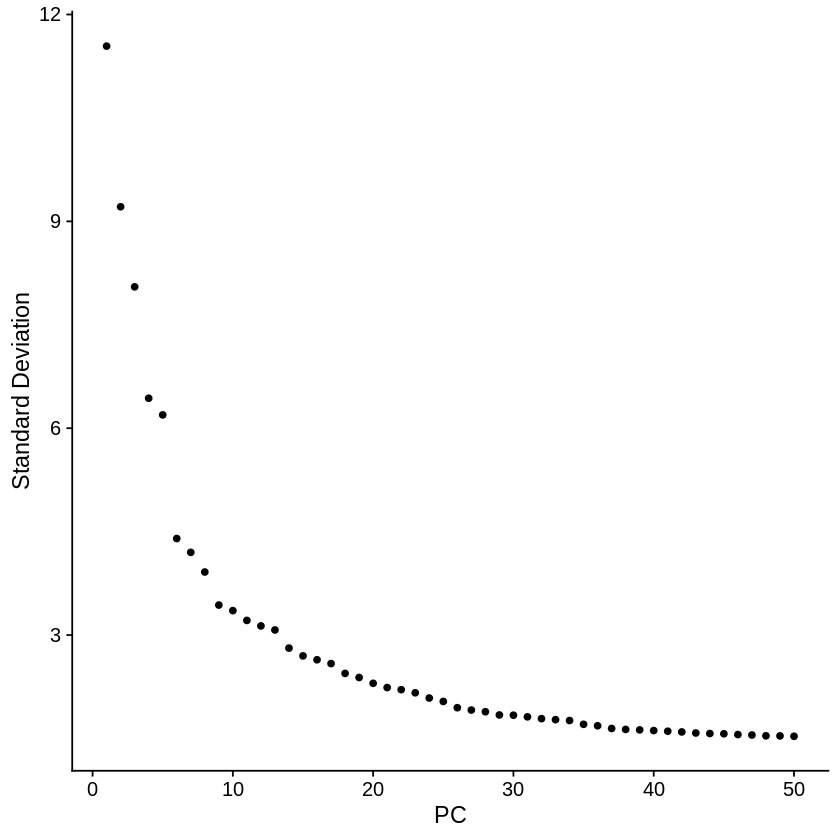

In [10]:
ElbowPlot(dataobj, ndims = 80) 
# pdf(paste0(datasetName,"seurat.elbowplot.pdf"))

In [11]:
dev.off()
pcDim = 20 # set as 75 in this case 
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)
DimPlot(dataobj, reduction = "umap", label = TRUE)
# ggsave(paste0(datasetName,".seurat.umap.tiff", plot = p_umap, width = 8, height = 5)

null device 
          1

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
22:41:08 UMAP embedding parameters a = 0.9922 b = 1.112

22:41:08 Read 3244 rows and found 20 numeric columns

22:41:08 Using Annoy for neighbor search, n_neighbors = 30

22:41:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

22:41:08 Writing NN index file to temp file /tmp/RtmpoJqaWH/file784f5fea5aeb

22:41:08 Searching Annoy index using 1 thread, search_k = 3000

22:41:09 Annoy recall = 100%

22:41:09 Commencing smooth kNN distance calibration using 1 thread

22:41:10 Initializing fr

In [12]:
# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)
dataobj <- FindClusters(dataobj, resolution = 0.1, n.start = 5)
# umap
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3244
Number of edges: 110067

Running Louvain algorithm...
Maximum modularity in 5 random starts: 0.9689
Number of communities: 12
Elapsed time: 0 seconds


22:41:18 UMAP embedding parameters a = 0.9922 b = 1.112

22:41:18 Read 3244 rows and found 20 numeric columns

22:41:18 Using Annoy for neighbor search, n_neighbors = 30

22:41:18 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

22:41:19 Writing NN index file to temp file /tmp/RtmpoJqaWH/file784f767d1e79

22:41:19 Searching Annoy index using 1 thread, search_k = 3000

22:41:20 Annoy recall = 100%

22:41:20 Commencing smooth kNN distance calibration using 1 thread

22:41:21 Initializing from normalized Laplacian + noise

22:41:21 Commencing optimization for 500 epochs, with 140134 positive edges

22:41:29 Optimization finished



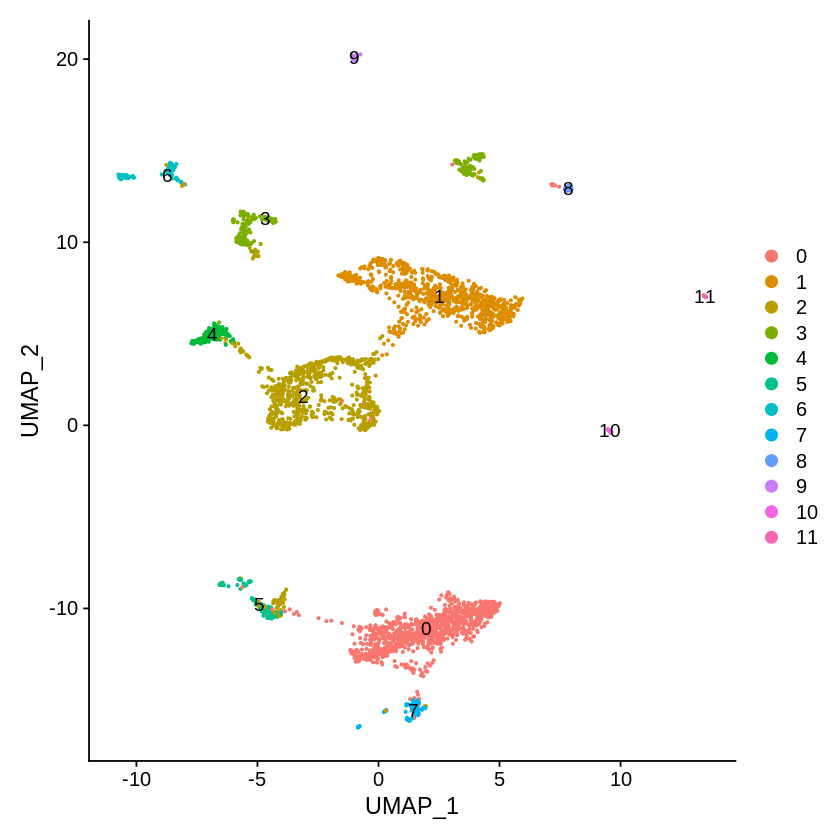

In [13]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE)
p_umap

In [16]:
ggsave(paste0(datasetName,"_seq-well.seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)

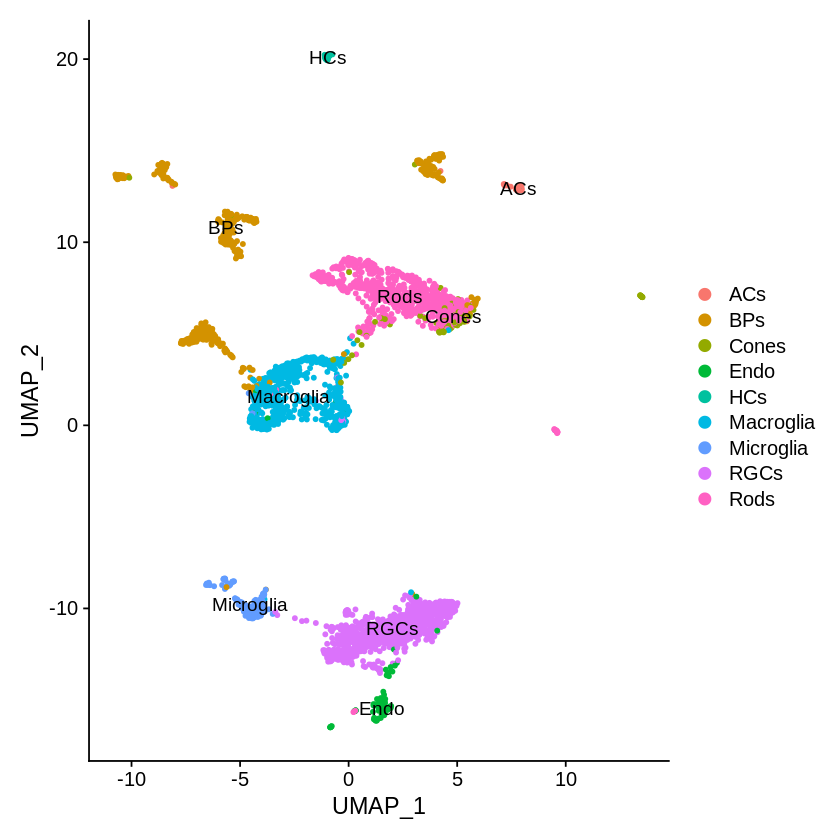

In [15]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1)# + NoLegend()
p_umap2

In [17]:
ggsave(paste0(datasetName,"_seq-well.seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)

In [19]:
# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,"_seq-well.seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11



In [21]:
new.cluster.ids <- c("Eye-Nerve tissue-Retina ganglion cell-NEFL", 'Eye-Nerve tissue-Rod cell-PDE6A', 'Eye-Nerve tissue-Muller cell-GLUL',
                    'Eye-Nerve tissue-Bipolar cell-CAMK2B', 'Eye-Nerve tissue-Bipolar cell-CAMK2B', 'Eye-Nerve tissue-Microglia-C1QA',
                    'Eye-Nerve tissue-Bipolar cell-CAMK2B', 'Eye-Epithelial tissue-Endothelial cell-TM4SF1 and SPARC', 'Unknown',
                    'Eye-Nerve tissue-Horizontal cell-ONECUT1', 'Unknown', 'Eye-Nerve tissue-Cone cell-GNAT2')
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)

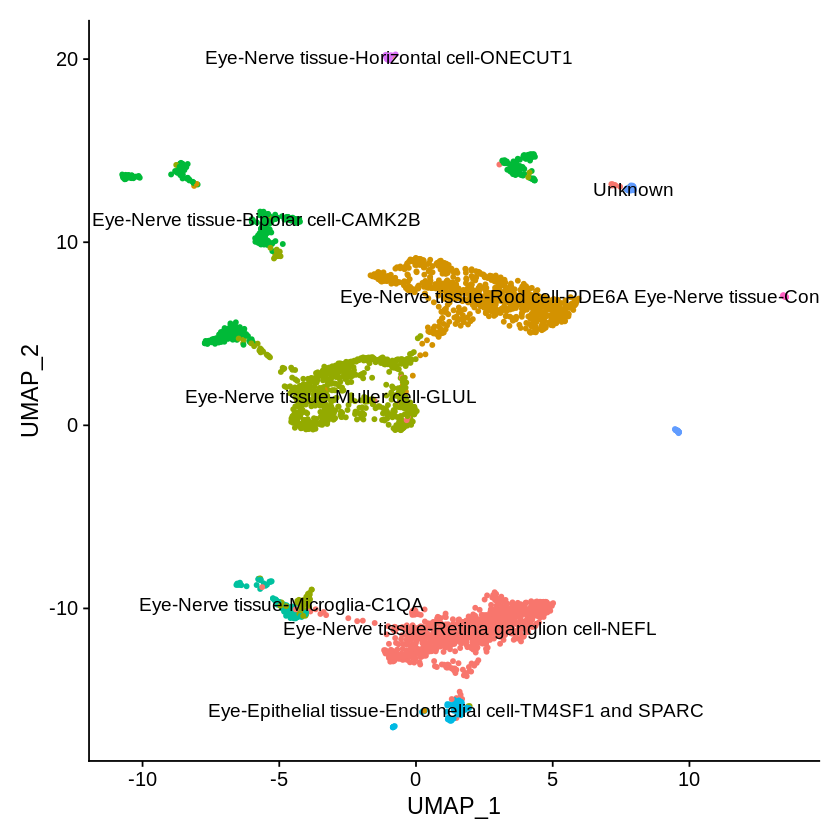

In [24]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1) + NoLegend()
p_umap2

In [25]:
ggsave(paste0(datasetName,"_seq-well.seurat.umap_hcad.tiff"), plot = p_umap2, width = 8, height = 5)

In [20]:
annotation <- as.data.frame(cbind(colnames(data.matrix), orig_cluster = as.character(data.annotation$cell_cluster), seurat_cluster = as.character(Idents(dataobj))))
annotation <- annotation[, -1]
annotation <- annotation[order(annotation$seurat_cluster), ]
print(annotation)

Warning message in cbind(colnames(data.matrix), orig_cluster = as.character(data.annotation$cell_cluster), :
“number of rows of result is not a multiple of vector length (arg 3)”


     orig_cluster seurat_cluster
31           RGCs              0
33           RGCs              0
36           RGCs              0
64           RGCs              0
65           RGCs              0
76           RGCs              0
80           RGCs              0
88           RGCs              0
91           RGCs              0
94           RGCs              0
95           RGCs              0
99           RGCs              0
119          RGCs              0
120          RGCs              0
126          RGCs              0
128          RGCs              0
135          RGCs              0
138          RGCs              0
141          RGCs              0
155          RGCs              0
159          RGCs              0
162          RGCs              0
163          RGCs              0
164          RGCs              0
165          RGCs              0
170          RGCs              0
176          RGCs              0
178          RGCs              0
179          RGCs              0
183       

In [47]:
saveRDS(dataobj, file = paste0(datasetName,"_seq-well.seuratobj.rds"))